In [1]:
import numpy as np
import random
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

### Task 1

Define function to generate the phi and y for a train set based on the correct model.  and the structure of the correct model (5th degree polynomial with the coefficient of the 4th power equal to zero). We use for N equidistant points in the interval [0,2].

In [56]:
def generate_train_data_correct_model(N, mean_noise, var_noise, theta):
    # Generate a sample of noise with noise variance=var_noise of size N
    noise = np.random.normal(mean_noise, np.sqrt(var_noise), N)
    #Create an empty array of N points. This will be filled afterwards with our train set y points
    y = np.empty(N)
    phi = np.empty([N, 5])
    x = 0
    for i in range(N): 
        phi[i] = np.array([x, x**2, x**3, x**5, 1])
        y[i] = np.matmul(theta, phi[i]) + noise[i]
        x += 2/(N-1)    
    return y, phi

Create the model and the training data.

In [63]:
# Create the correct parameter vector. These parameter values will be used to generate our y_train data and are equal to theta.
theta = np.array([-1, 0.9, 0.7, -0.2, 0.2])

N = 20
y_train, phi = generate_train_data_correct_model(N, 0, 0.1, theta)

print("x train: ", phi)
print("y train: ", y_train)

x train:  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [1.05263158e-01 1.10803324e-02 1.16635078e-03 1.29235543e-05
  1.00000000e+00]
 [2.10526316e-01 4.43213296e-02 9.33080624e-03 4.13553739e-04
  1.00000000e+00]
 [3.15789474e-01 9.97229917e-02 3.14914711e-02 3.14042371e-03
  1.00000000e+00]
 [4.21052632e-01 1.77285319e-01 7.46464499e-02 1.32337197e-02
  1.00000000e+00]
 [5.26315789e-01 2.77008310e-01 1.45793847e-01 4.03861073e-02
  1.00000000e+00]
 [6.31578947e-01 3.98891967e-01 2.51931768e-01 1.00493559e-01
  1.00000000e+00]
 [7.36842105e-01 5.42936288e-01 4.00058318e-01 2.17206178e-01
  1.00000000e+00]
 [8.42105263e-01 7.09141274e-01 5.97171599e-01 4.23479029e-01
  1.00000000e+00]
 [9.47368421e-01 8.97506925e-01 8.50269719e-01 7.63122961e-01
  1.00000000e+00]
 [1.05263158e+00 1.10803324e+00 1.16635078e+00 1.29235543e+00
  1.00000000e+00]
 [1.15789474e+00 1.34072022e+00 1.55241289e+00 2.08135135e+00
  1.00000000e+00]
 [1.26315789e+00 1.59556787e+0

Define function for the Least Squares method.

In [64]:
def least_squares(y, phi):
    phi_trans = np.transpose(phi)
    theta_LS = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi_trans, phi)), phi_trans), y) 
    # Return the coefficients of the linear regression method.
    return theta_LS

Define function for calculating the Mean Square Error.

In [65]:
def MSE(y_true, theta_pred, phi):
    sum = 0
    N = phi.shape[0]
    for i in range(N):
        y_pred = np.matmul(theta_pred, phi[i])
        sum += (y_pred - y_true[i])**2
    MSE = sum/N
    return MSE

Define function to generate the phi and y for a test set.

In [66]:
def generate_test_data(N, theta):
    phi = np.empty([N, 5])
    y = np.empty(N)
    for i in range(N): 
        x = random.uniform(0, 2)
        phi[i] = np.array([x, x**2, x**3, x**5, 1])
        y[i] = np.matmul(theta, phi[i]) 
    return y, phi

Apply the Least Squares method and calculate the MSE of the training set and of test set of 1000 points.

In [67]:
# Calculate the theta (parameter vector - coefficients) using the Least Squares method over our train dataset. 
theta_LS = least_squares(y_train, phi)

# Calculate the MSE of y over the training set. We will use the theta_LS calculated above.
MSE1 = MSE(y_train, theta_LS, phi)

# Create a  test set comprising of 1000 points randomly selected in the interval [0,2]. 
y_test, phi_test = generate_test_data(1000, theta)
    
# Calculate the MSE of y over the test set. We will use the same theta_LS calculated above.
MSE2 = MSE(y_test, theta_LS, phi_test)

print('The parameter vector θ_LS is [θο,θ1,θ2,θ3,θ5]: ', theta_LS[[4, 0, 1, 2, 3]])
print('MSE for N=20 sample: ', MSE1)
print('MSE for N=1000 sample: ', MSE2)

The parameter vector θ_LS is [θο,θ1,θ2,θ3,θ5]:  [ 0.40104727 -2.24851794  3.61768824 -1.09704876 -0.0130808 ]
MSE for N=20 sample:  0.06706689401308365
MSE for N=1000 sample:  0.01466777281240972


### Task 2

Create the 2nd degree model and the data.

In [68]:
# For the 2nd degree model we create the parameter vectors theta and theta true. 
# The theta parameter vector will be used in order to extract the theta_LS. 
# For the 2 degrees and the constant of our model we will use the correct values of parameters.
theta = np.array([-1, 0.9, 0.2]) 
# this is θο and it will be used to create out y_train dataset
theta_true = np.array([-1, 0.9, 0.7, -0.2, 0.2]) 

# Generate our phi matrix using N=20, variance=0.1 and the structure of the 2nd degree model.
# We use N=20 equidistant points in the interval [0,2].
N = 20
phi = np.empty([N, 3])
phi_true = np.empty([N, 5])
# We will store the x array because we will need it later for the plotting.
x = 0
x_arr = []
for i in range(N): 
    # We calculate phi_true in order to calculate our y_train dataset.
    phi_true[i] = np.array([x,x**2,x**3,x**5,1]) 
    phi[i] = np.array([x,x**2,1]) 
    x_arr.append(x)
    x += 2/(N-1)

Define function that applies the Least Squares Method and executes experiments using different noise samples for each of them.


In [69]:
def execute_experiments(exper_num, N, mean_noise, var_noise, theta_true, phi_true, phi):
    # In this matrix each row represents the No of the experiment and each column the x that corresponds
    # to the prediction of y. We will fill this matrix with all the predictions.
    y_pred = np.empty([exper_num, N]) 

    for experiment in range(exper_num):
        # Generate a sample of noise for each experiment.
        noise = np.random.normal(mean_noise, np.sqrt(var_noise), N)

        # Create our y-train using the theta true parameter vector and the phi_true parameter matrix.
        y_train = np.empty(N)
        for i in range(N):
            y_train[i] = np.matmul(theta_true, phi_true[i]) + noise[i]

        # Calculate the theta (parameter vector - coefficients) using the Least Squares Method over our train dataset. 
        theta_LS = least_squares(y_train, phi)

        # Find the predictions for all the 100 experiments of each x.  
        for i in range(N):
            y_pred[experiment][i] = np.matmul(theta_LS, phi[i])
        
    return y_pred

Execute 100 experiments.

In [70]:
y_pred = execute_experiments(100, N, 0, 0.1, theta_true, phi_true, phi)

Define function that calculates the mean and variance of y over the experiments.

In [71]:
def calc_mean_var(y_pred, N, exper_num):
    mean_y_pred = np.empty([N])
    for i in range(20):
        sum = 0
        for exper in range(exper_num):
            sum += y_pred[exper][i]
        mean_y_pred[i] = sum/exper_num

    var_y_pred = np.empty([N])
    for i in range(N):
        sum = 0
        for exper in range(exper_num):
            sum += (y_pred[exper][i] - mean_y_pred[i])**2
        var_y_pred[i] = sum/(exper_num-1)  

    return mean_y_pred, var_y_pred

Define function to plot the mean, variance of y and the curve of the true model.

In [72]:
def plot_mean_var_curve(x_arr, mean_y, var_y, x_true, y_true, legend=['Real 5th degree model', 'Prediction of our 5th degree model for N=20 samples.']):
    figure(figsize=(12, 9), dpi=80)
    # we will display +-1 standard deviation for each point
    plt.errorbar(x_arr, mean_y_pred, yerr=var_y_pred**0.5, fmt='o')
    plt.plot(x_true, y_true)
    plt.grid('True')
    plt.axvline()
    plt.axhline()
    plt.legend(legend)
    plt.title('Each one of the blue points, (y, x), indicates the prediction (yˆ) corresponding to the input value, x. The error bars are dictated by +-1 Of the Computed Standard Deviation.')
    plt.suptitle('Prediction vs true values')
    plt.show

Define function to calculate the curve obtained by the true model.

In [73]:
def calc_true_curve(num, range_min, range_max):
    x_true = np.linspace(range_min, range_max, num=num)
    y_true = []
    for i in range(len(x_true)):
        y_true.append(-0.2 * x_true[i]**5 + 0.7 * x_true[i]**3 + 0.9 * x_true[i]**2 - x_true[i] + 0.2)
    return x_true, y_true

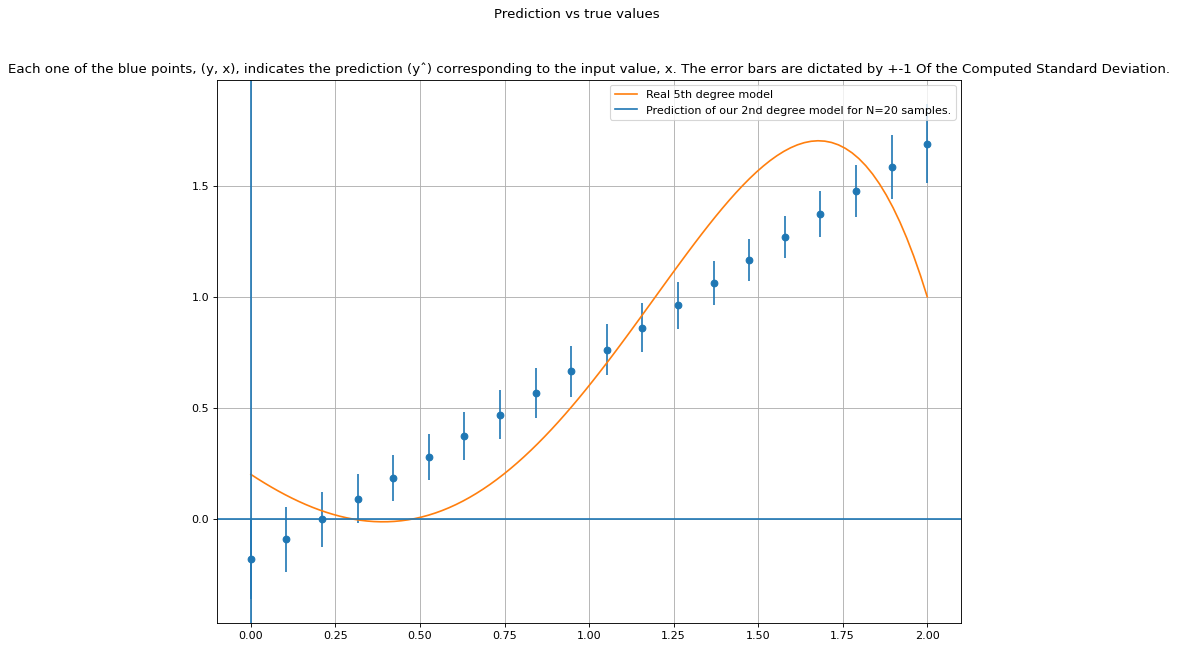

In [74]:
# Calculate the mean and variance vectors (extracted from the 100 experiments) for each of the 20 equidistant point between 0 and 2.
mean_y_pred, var_y_pred = calc_mean_var(y_pred, N, 100)

# Calculate the curve of the true model.
x_true, y_true = calc_true_curve(100, 0, 2)

# Plot the results.
plot_mean_var_curve(x_arr, mean_y_pred, var_y_pred, x_true, y_true, ['Real 5th degree model', 'Prediction of our 2nd degree model for N=20 samples.'])

**Repeat experiments using a 10th degree polynomial.**

First create the data.

In [75]:
# Create the parameter vectors theta and theta_true. 
# The theta parameter vector will be used in order to extract the theta_ls. 
# For the first 5 degrees and the constant of our model we will use the correct values of parameters of
# theta_true (meaning 0 for the 4th degree). Then till the 10th degree we will use number 1.
theta = np.array([-1, 0.9, 0.7, -0.2, 0.2, 1, 1, 1, 1, 1, 0.2]) 
# This is θο and it will be used to create our y_train dataset.
theta_true = np.array([-1, 0.9, 0.7, -0.2, 0.2]) 

# Generate our phi matrix using N=20, var=0.1 and the structure of the qnd degree model.
# We use for N=20 equidistant points in the interval [0,2]. 
N = 20
phi = np.empty([N, 10])
phi_true = np.empty([N, 5])
x = 0
x_arr = []
for i in range(N): 
    # We calculate this in order to calculate our y_train dataset.
    phi_true[i] = np.array([x, x**2, x**3, x**5, 1]) 
    phi[i] = np.array([x, x**2, x**3, x**5, x**6, x**7, x**8, x**9, x**10, 1]) 
    x_arr.append(x)
    x += 2/(N-1)

Apply the Least Squares Method and execute 100 experiments using different 
noise samples for each of them.

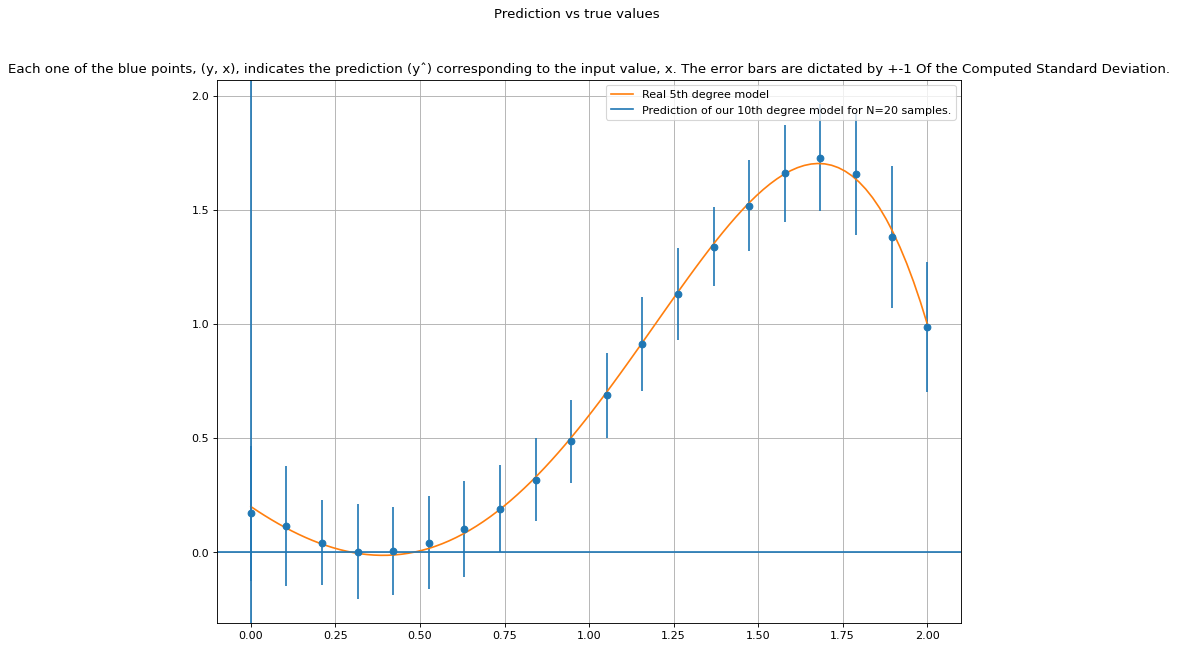

In [76]:
y_pred = execute_experiments(100, N, 0, 0.1, theta_true, phi_true, phi)
        
mean_y_pred, var_y_pred = calc_mean_var(y_pred, N, 100)

# Plot the results.
plot_mean_var_curve(x_arr, mean_y_pred, var_y_pred, x_true, y_true, ['Real 5th degree model', 'Prediction of our 10th degree model for N=20 samples.'])

Conclusion for exercise 2: The bias - variance tradeoff dilemma is obvious in the above two plots. In our 2nd degree model the complexity is lower than the real model, thus we have increased bias for our 100 experiments. Our model did not achieve to trully predict the real outcome of the true curve, but its variance is very low and the results for all experiments are quite concentrated next to the mean value calculated for each one of the 20 equidistant points between 0 and 2. On the other hand, our choice for a 10th degree function was a choice of big complexity, it was not very smooth and that resulted to an overfitting. Adding up and extracting the mean for all 100 experiments has a result very close to the true curve in the same 20 equidistand points, but if we had ploted all the 100 20-point sets generated for each experiment, we would have seen that they are scattered all over the diagram, due to our model's high complexity. So, obviously in that case high complexity led to high variance and small bias.

### Task 3

Define function for the Ridge Regression method.

In [129]:
def ridge_regression(y, phi, l):
    phi_trans = np.transpose(phi)
    theta_RR = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi_trans, phi) + np.identity(5) * l), phi_trans), y) 
    # Return the coefficients of the linear regression method.
    return theta_RR

Execute Least Regression for the train and test datasets and calculate their MSEs.


Execute Ridge Regression on the train and test datasets using different values of lambda.


We will execute 10 experiments extracting 10 different train and test sets each time, and we will find the average of THE MSEs using the MSEs counted for each experiment. This is in order to get a more representative result of where the global minima of the MSE of ridge regression (depending solely on the value of λ) lies.

In [158]:
list_l=[0.000001, 0.0001, 0.001, 0.01,0.1,0.2,0.3,0.5, 1, 10, 100, 1000, 10000, 100000]
# We will create a dictionairy to save the average of the experiments for each for the MSEs of each λ calculated by
#the RR method when N=1000. We will also calculate the average of the experiments for the Least Squares Method.

MSE_avg_Least_Squares=0
Dict_avg_MSE_l={}
for count in range(len(list_l)):
    Dict_avg_MSE_l[list_l[count]]=0
    
    
    
for experiment in range (10):
    #Create the train and test data of the experiment.
    # Create the correct parameter vector. These parameter values will be used to generate our y_train data and are equal to theta.
    theta = np.array([-1, 0.9, 0.7, -0.2, 0.2])
    N = 20
    y_train, phi = generate_train_data_correct_model(N, 0, 0.1, theta)

    # Create a test set comprising of 1000 points randomly selected in the interval [0,2]. 
    y_test, phi_test = generate_test_data(1000, theta)
    
    
    # FOR THE LEAST SQUARES METHOD:
    theta_LS = least_squares(y_train, phi)
    # Calculate the MSE of LS method over the test set.
    MSE_test_LS = MSE(y_test, theta_LS, phi_test)
    MSE_avg_Least_Squares+=MSE_test_LS
    # Calculate the MSE of LS method over the training set.
    MSE_train_LS = MSE(y_train, theta_LS, phi)
    MSE
    #print ('                                 The MSEs for Least Squares Method are:\n')
    #print('MSE for N=20 sample training set using Least Squares method is: ', MSE_train_LS)
    #print('MSE for N=1000 sample test set using Least Squares method is: ', MSE_test_LS)
    #print('------------------------------------------------------------------------------------------------')
    #print('------------------------------------------------------------------------------------------------')
    #print ('                                 The MSEs for Ridge Regression Method are:\n')
    
    #FOR THE RIDGE REGRESSION METHOD:
    for l in list_l:
        # Calculate the theta (parameter vector - coefficients) using the Ridge Regression method and the Least Squares method. 
        theta_RR = ridge_regression(y_train, phi, l)

        # Calculate the MSE of RR method over the training set.
        MSE_train_RR = MSE(y_train, theta_RR, phi)

        # Calculate the MSE of RR method over the test set.
        MSE_test_RR = MSE(y_test, theta_RR, phi_test)
    
        #print('λ=', l)
        #print('MSE for N=20 sample training set using Ridge Regression is: ', MSE_train_RR)
        #print('MSE for N=1000 sample test set using Ridge Regression method is: ', MSE_test_RR)
        #print('------------------------------------------------------------------------------------------------')
        Dict_avg_MSE_l[l]+=MSE_test_RR

MSE_avg_Least_Squares=MSE_avg_Least_Squares/(experiment+1)
for count in range(len(list_l)):
     Dict_avg_MSE_l[list_l[count]]=Dict_avg_MSE_l[list_l[count]]/(experiment+1)
        

print ('MSE for N=1000 sample test set using Least Squares method over an experiment of 10 is: ',MSE_avg_Least_Squares )
print('------------------------------------------------------------------------------------------------')
print ('MSE for N=1000 sample test set using Ridge Regression over an experiment of 10 for a various number of λs is:\n '),

for count in range (len(list_l)):
    print ('For λ=', list_l[count],' its average MSE for Ridge Regression over 10 experiments is: ', Dict_avg_MSE_l[list_l[count]] )

MSE for N=1000 sample test set using Least Squares method over an experiment of 10 is:  0.02818975371260505
------------------------------------------------------------------------------------------------
MSE for N=1000 sample test set using Ridge Regression over an experiment of 10 for a various number of λs is:
 
For λ= 1e-06  its average MSE for Ridge Regression over 10 experiments is:  0.028187093933445196
For λ= 0.0001  its average MSE for Ridge Regression over 10 experiments is:  0.02792974380192722
For λ= 0.001  its average MSE for Ridge Regression over 10 experiments is:  0.026035740869928214
For λ= 0.01  its average MSE for Ridge Regression over 10 experiments is:  0.020493572596585897
For λ= 0.1  its average MSE for Ridge Regression over 10 experiments is:  0.016454845751495247
For λ= 0.2  its average MSE for Ridge Regression over 10 experiments is:  0.016200754897893233
For λ= 0.3  its average MSE for Ridge Regression over 10 experiments is:  0.01674249361194508
For λ= 0.5  

We observe that the smaller MSE is achieved for values of λ between 0.1 and 0.3. (Global Minima of the MSE function depending on λ is between 0.1 and 0.2). After that MSE score begins to augment and for a value of λ between 1 and 10 and greater 
it achieves worse performance than the least score method

### Task 4

In [117]:
def bayesian_inference(var_theta, var_noise, x_test, y_train, N_test, phi, theta0):
    phi_trans = np.transpose(phi)
    # Calculate μθ|y. Our uncertainty for theta0 chosen is given as var_theta. Mind that in that case 
    # we have chosen as theta0 the correct parameter vector theta.
    mean_theta_y = theta0 + (1/var_noise) * np.matmul(np.matmul(np.linalg.inv((1/var_theta) * np.identity(5) + (1/var_noise) * np.matmul(phi_trans, phi)), phi_trans), y_train - np.matmul(phi, theta0))
    # Create the random vector μy (evaluation of y of my test set) and var_y (variance of the evaluation).
    mean_y = np.empty([N_test])
    var_y = np.empty([N_test])
    for i in range(N_test):
        x = x_test[i]
        phi_small = np.array([x, x**2, x**3, x**5, 1])
        phi_small_trans = np.transpose(phi_small)
        mean_y[i] = np.matmul(phi_small_trans, mean_theta_y)
        var_y[i] = var_noise + (var_noise * var_theta) * np.matmul(np.matmul(phi_small_trans, np.linalg.inv(var_noise * np.identity(5) + var_theta * np.matmul(phi_trans, phi))), phi_small)
    
    return mean_y, var_y

<function matplotlib.pyplot.show(close=None, block=None)>

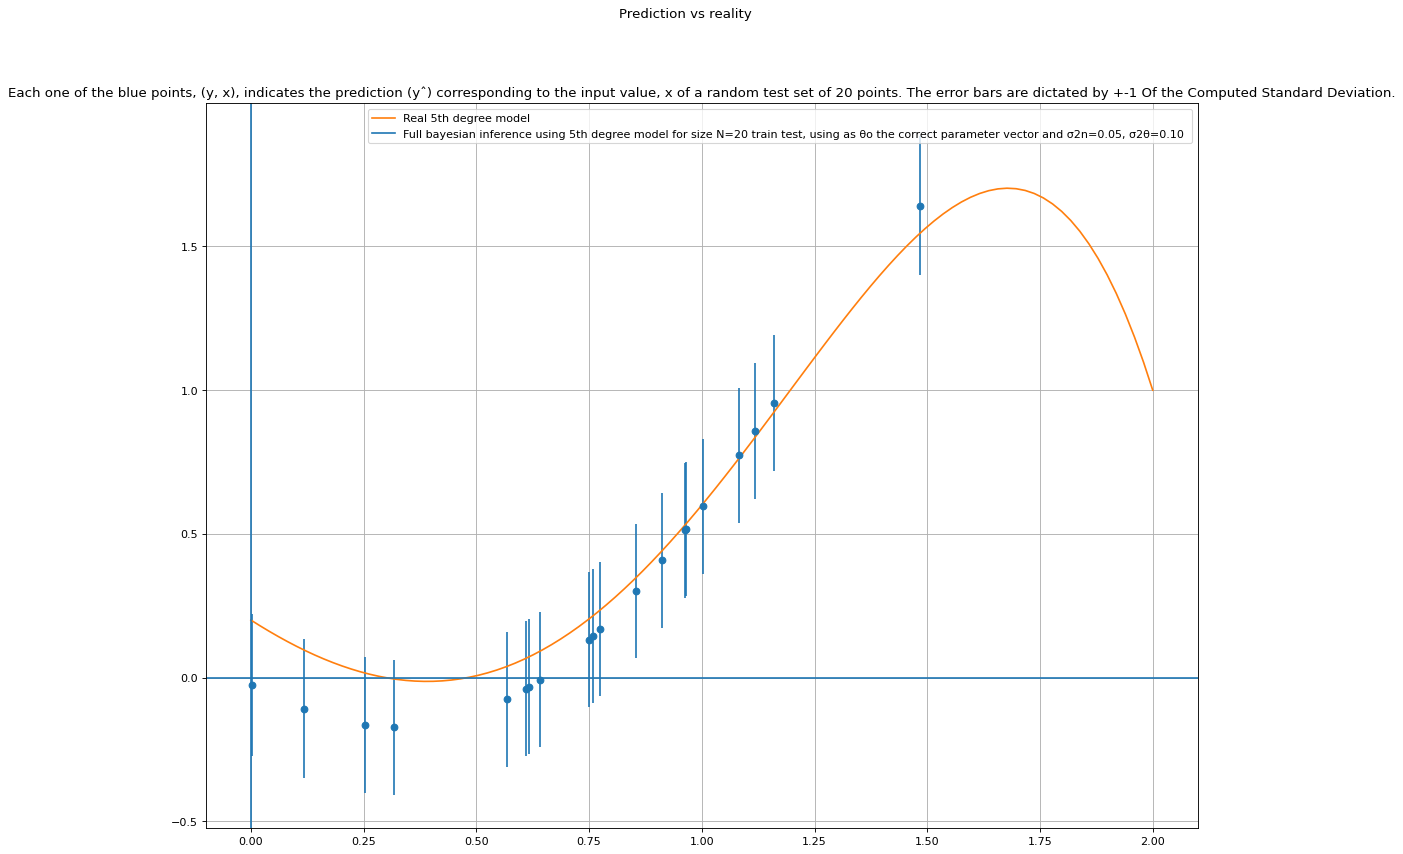

In [118]:
# Create the correct parameter vector. These parameter values will be used to generate our y_train data and are equal to theta.
theta = np.array([-1, 0.9, 0.7, -0.2, 0.2])

N = 20
var_noise = 0.05
y_train, phi = generate_train_data_correct_model(N, 0, var_noise, theta)

var_theta = 0.1

# Create a x-test set of 20 points randomly selected in the interval [0,2].
N_test = N
x_test = np.empty([N_test])
for i in range(N_test): 
    x_test[i] = random.uniform(0,2)
    
mean_y, var_y = bayesian_inference(var_theta, var_noise, x_test, y_train, N_test, phi, theta)

x_true, y_true = calc_true_curve(100, 0, 2)

# Plotting.
figure(figsize=(16, 12), dpi=80)
# we display +-1 standard deviation for each point.
plt.errorbar(x_test, mean_y, yerr=var_y**0.5, fmt='o')
plt.plot(x_true, y_true)
plt.grid('True')
plt.axvline()
plt.axhline()
plt.legend(['Real 5th degree model', 'Full bayesian inference using 5th degree model for size N=20 train test, using as θο the correct parameter vector and σ2n=0.05, σ2θ=0.10 '])
plt.title('Each one of the blue points, (y, x), indicates the prediction (yˆ) corresponding to the input value, x of a random test set of 20 points. The error bars are dictated by +-1 Of the Computed Standard Deviation.')
plt.suptitle('Prediction vs reality')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

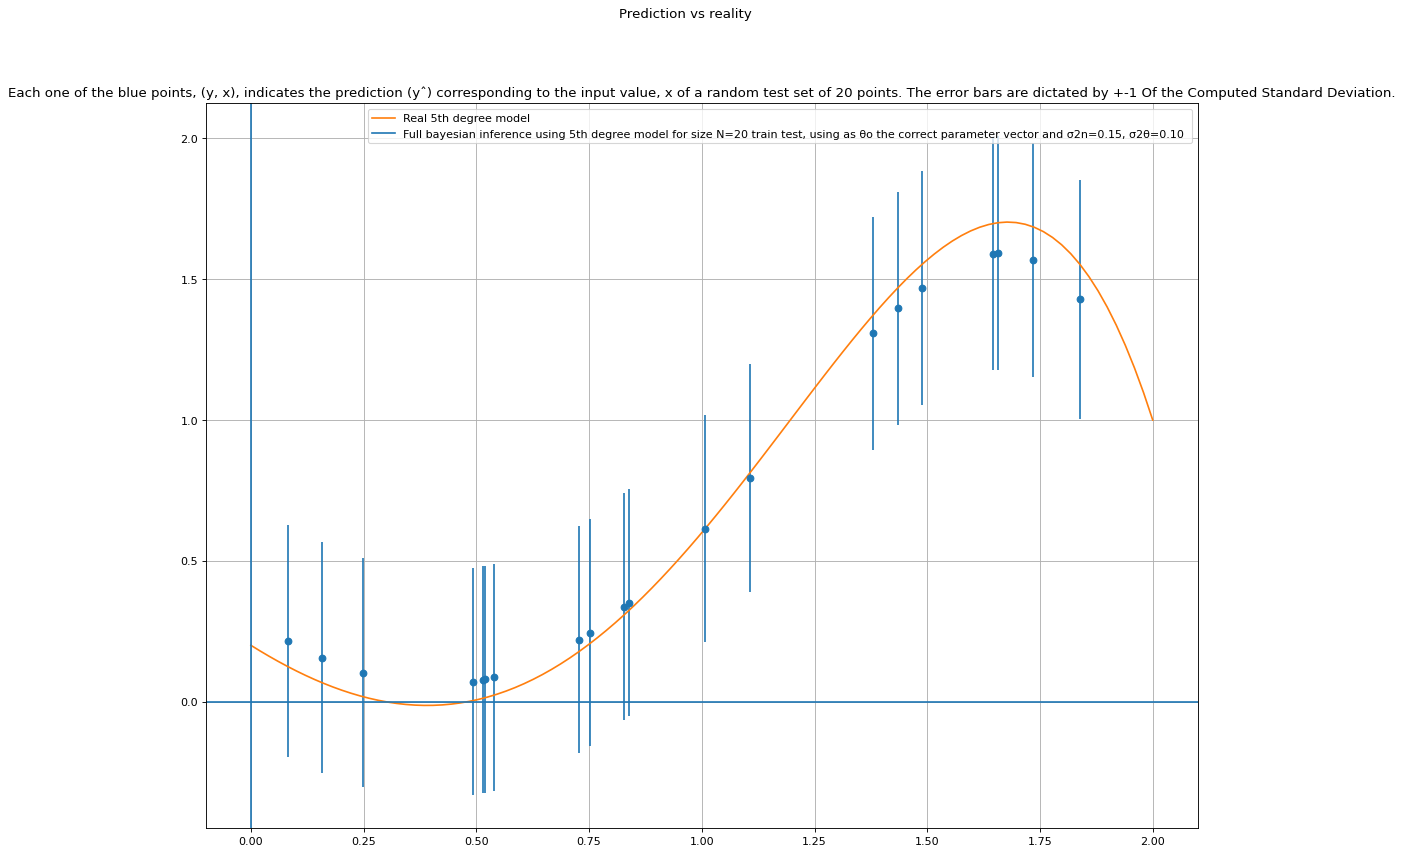

In [119]:
# Create the correct parameter vector. These parameter values will be used to generate our y_train data and are equal to theta.
theta = np.array([-1, 0.9, 0.7, -0.2, 0.2])

var_noise = 0.15
y_train, phi = generate_train_data_correct_model(N, 0, var_noise, theta)

# Create a  x-test set of 20 points randomly selected in the interval [0,2].
N_test = 20
x_test = np.empty([N_test])
for i in range(N_test): 
    x_test[i] = random.uniform(0,2)

var_theta = 0.1
theta0 = theta
mean_y, var_y = bayesian_inference(var_theta, var_noise, x_test, y_train, N_test, phi, theta0)

x_true, y_true = calc_true_curve(100, 0, 2)

# Plotting.
figure(figsize=(16, 12), dpi=80)
# we display +-1 standard deviation for each point.
plt.errorbar(x_test, mean_y, yerr=var_y**0.5, fmt='o')
plt.plot(x_true, y_true)
plt.grid('True')
plt.axvline()
plt.axhline()
plt.legend(['Real 5th degree model', 'Full bayesian inference using 5th degree model for size N=20 train test, using as θο the correct parameter vector and σ2n=0.15, σ2θ=0.10 '])
plt.title('Each one of the blue points, (y, x), indicates the prediction (yˆ) corresponding to the input value, x of a random test set of 20 points. The error bars are dictated by +-1 Of the Computed Standard Deviation.')
plt.suptitle('Prediction vs reality')
plt.show

### Task 5

Define a function to repeat the experiment with different θo, σ2n and N as inputs.Each time the N_test will be a random created set of datapoints in the interval (0,2)

In [120]:
def exec_bayesian_experiment(theta, var_noise, mean_noise, N, var_theta, theta0):
    y_train, phi = generate_train_data_correct_model(N, mean_noise, var_noise, theta)
    N_test=20
    #Create a  x-test set  of 20 points randomly selected in the interval [0,2].
    x_test = np.empty([N_test])
    for i in range(N_test): 
        x_test[i] = random.uniform(0,2)

    mean_y, var_y = bayesian_inference(var_theta, var_noise, x_test, y_train, N_test, phi, theta0)

    x_true, y_true = calc_true_curve(100, 0, 2)

    # Plotting.
    figure(figsize=(16, 12), dpi=80)
    # We display +-1 standard deviation for each point.
    plt.errorbar(x_test, mean_y, yerr=var_y**0.5, fmt='o')
    plt.plot(x_true, y_true)
    plt.grid('True')
    plt.axvline()
    plt.axhline()
    plt.legend(['Real 5th degree model.', 'Full bayesian inference using 5th degree model for size N={0} train test, using as θο a very wrong parameter vector and σ2n={1}, σ2θ={2}.'.format(N, var_noise, var_theta)])
    plt.title('Each one of the blue points, (y, x), indicates the prediction (yˆ) corresponding to the input value, x of a random test set of {0} points. The error bars are dictated by +-1 Of the Computed Standard Deviation.'.format(N))
    plt.suptitle('Prediction vs reality')
    plt.show


Repeat experiment above using θο=[-10.54,0.465,0.0087,-0.093,-0.004] and σ2θ=0.1 and N=20.

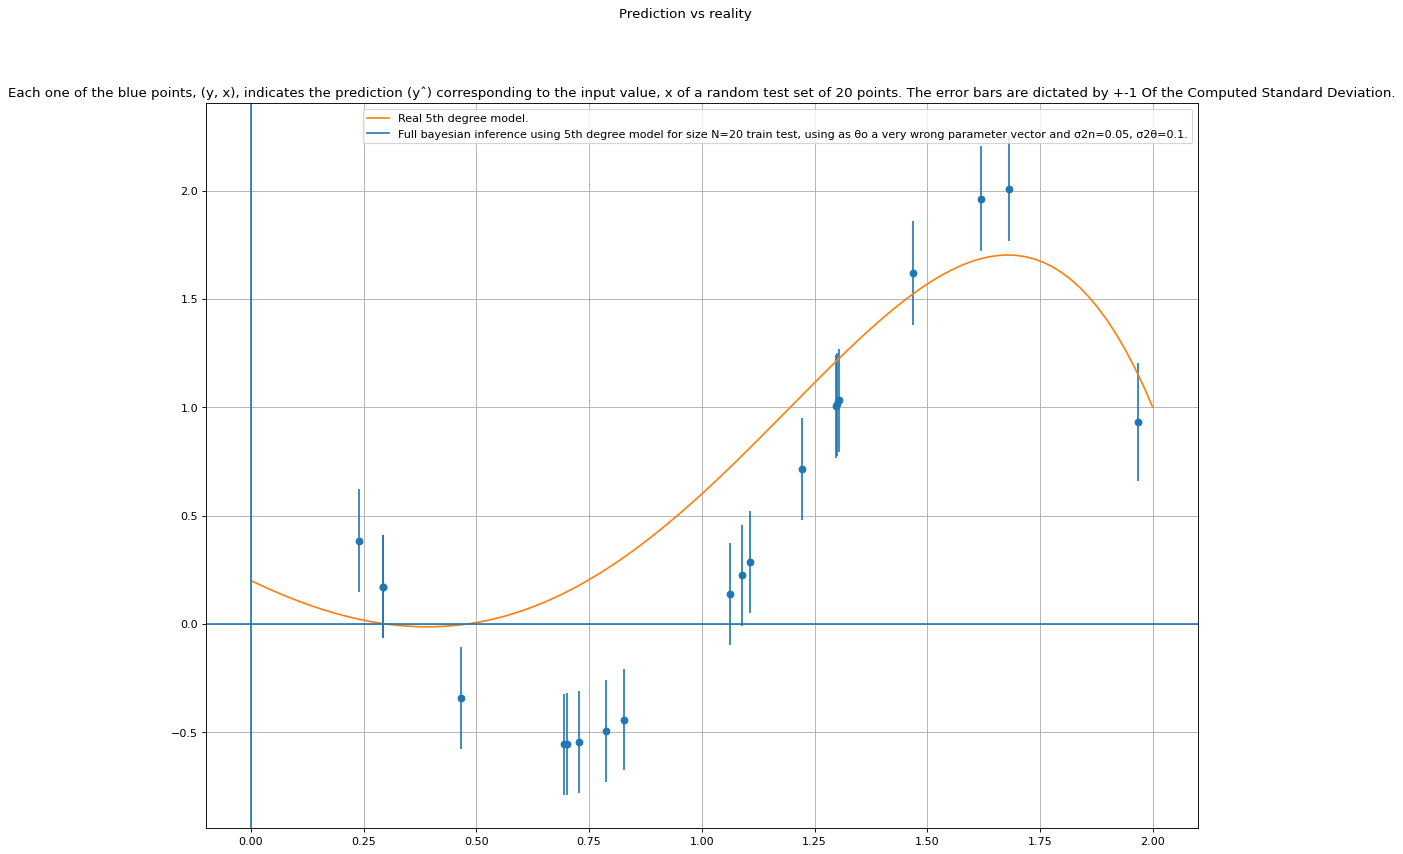

In [121]:
theta = np.array([-1, 0.9, 0.7, -0.2, 0.2])
theta0 = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])

exec_bayesian_experiment(theta, 0.05, 0, 20, 0.1, theta0)

Repeat experiment above using θο=[-10.54,0.465,0.0087,-0.093,-0.004] and σ2θ=2 and N=20.

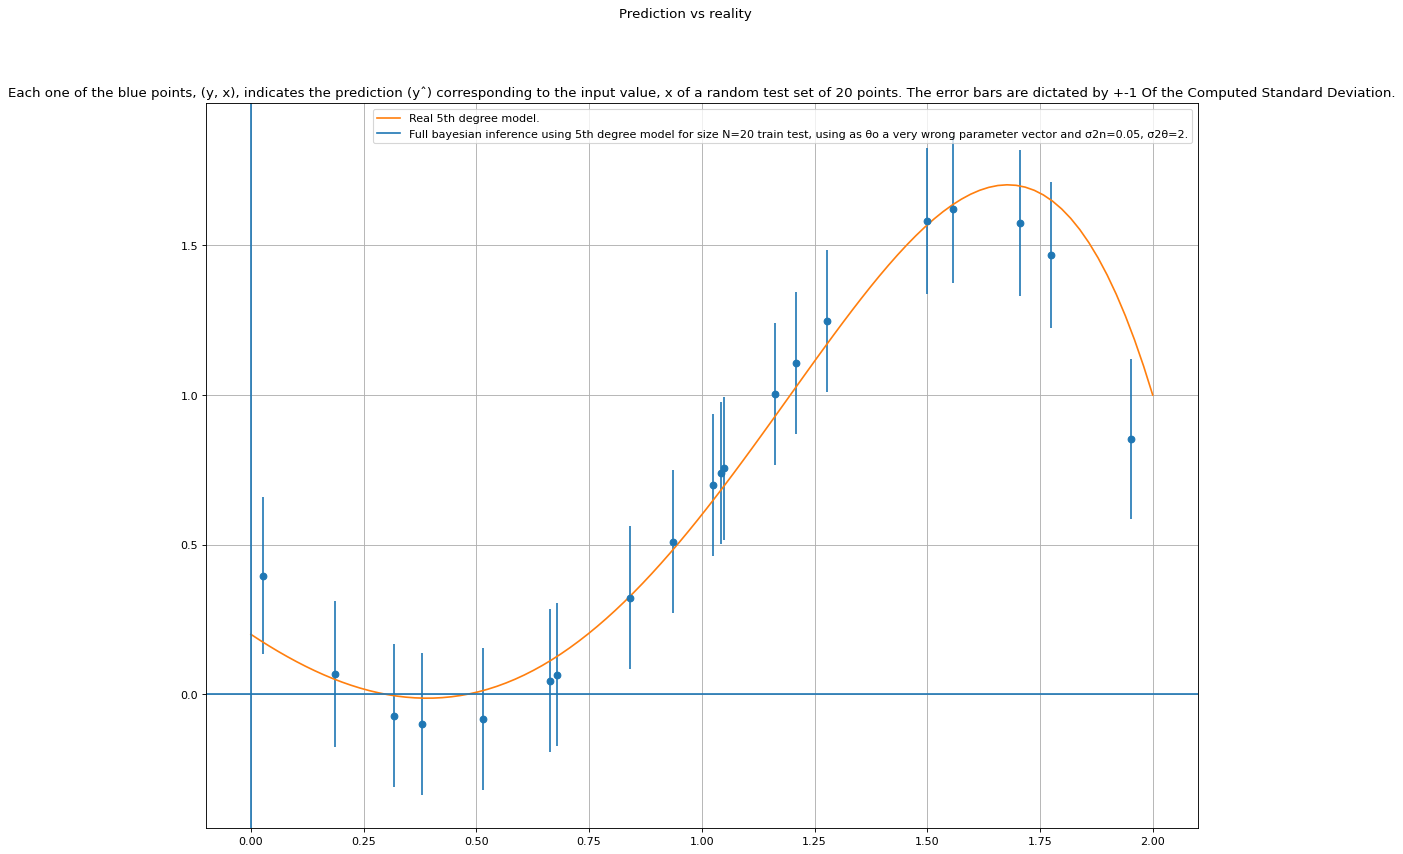

In [122]:
exec_bayesian_experiment(theta, 0.05, 0, 20, 2, theta0)

Repeat experiment above using θο=[-10.54,0.465,0.0087,-0.093,-0.004] and σ2θ=0.1 and N=500.

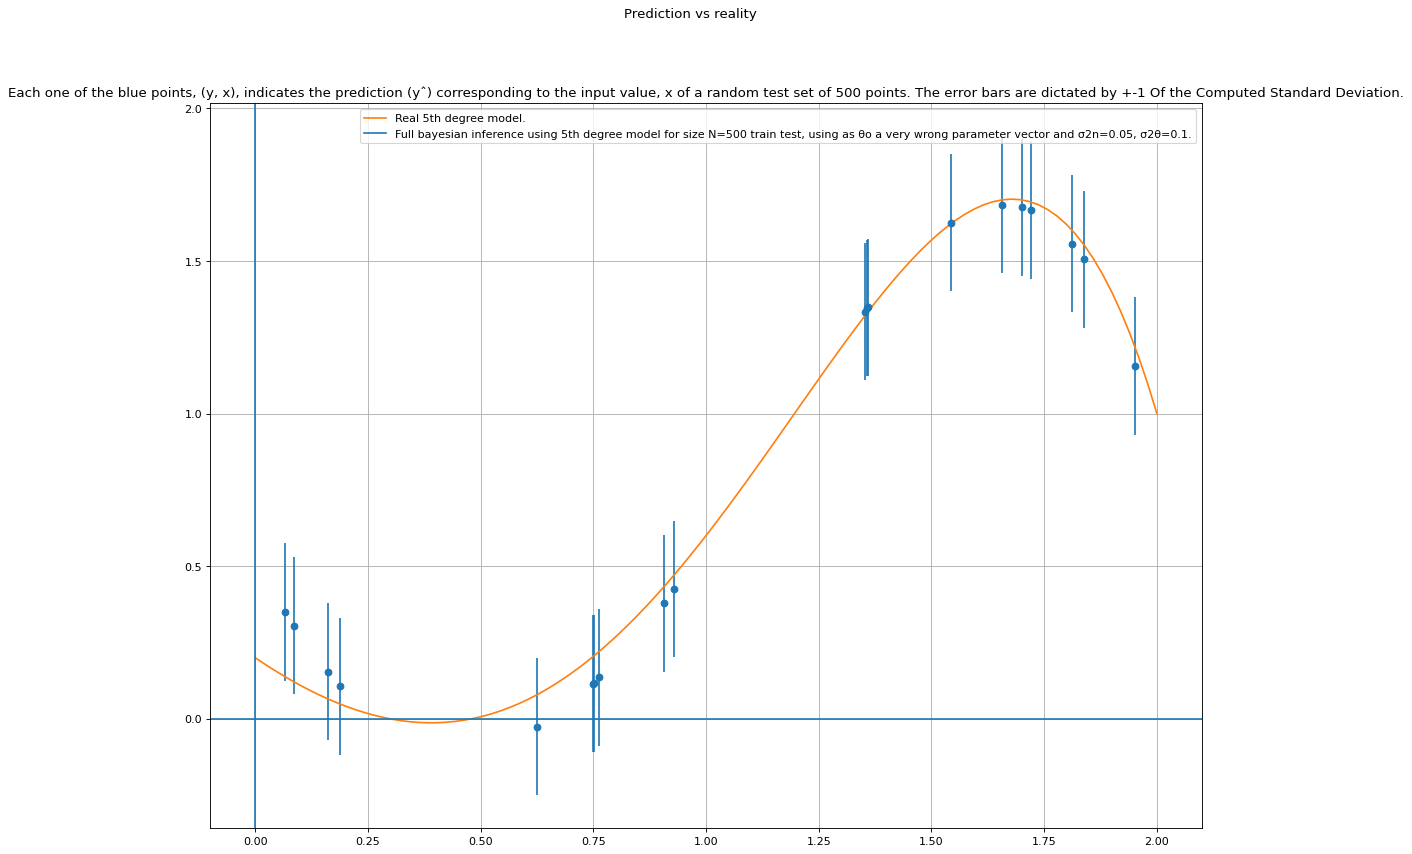

In [123]:
exec_bayesian_experiment(theta, 0.05, 0, 500, 0.1, theta0)

Repeat experiment above using θο=[-10.54,0.465,0.0087,-0.093,-0.004] and σ2θ=2 and N=500.

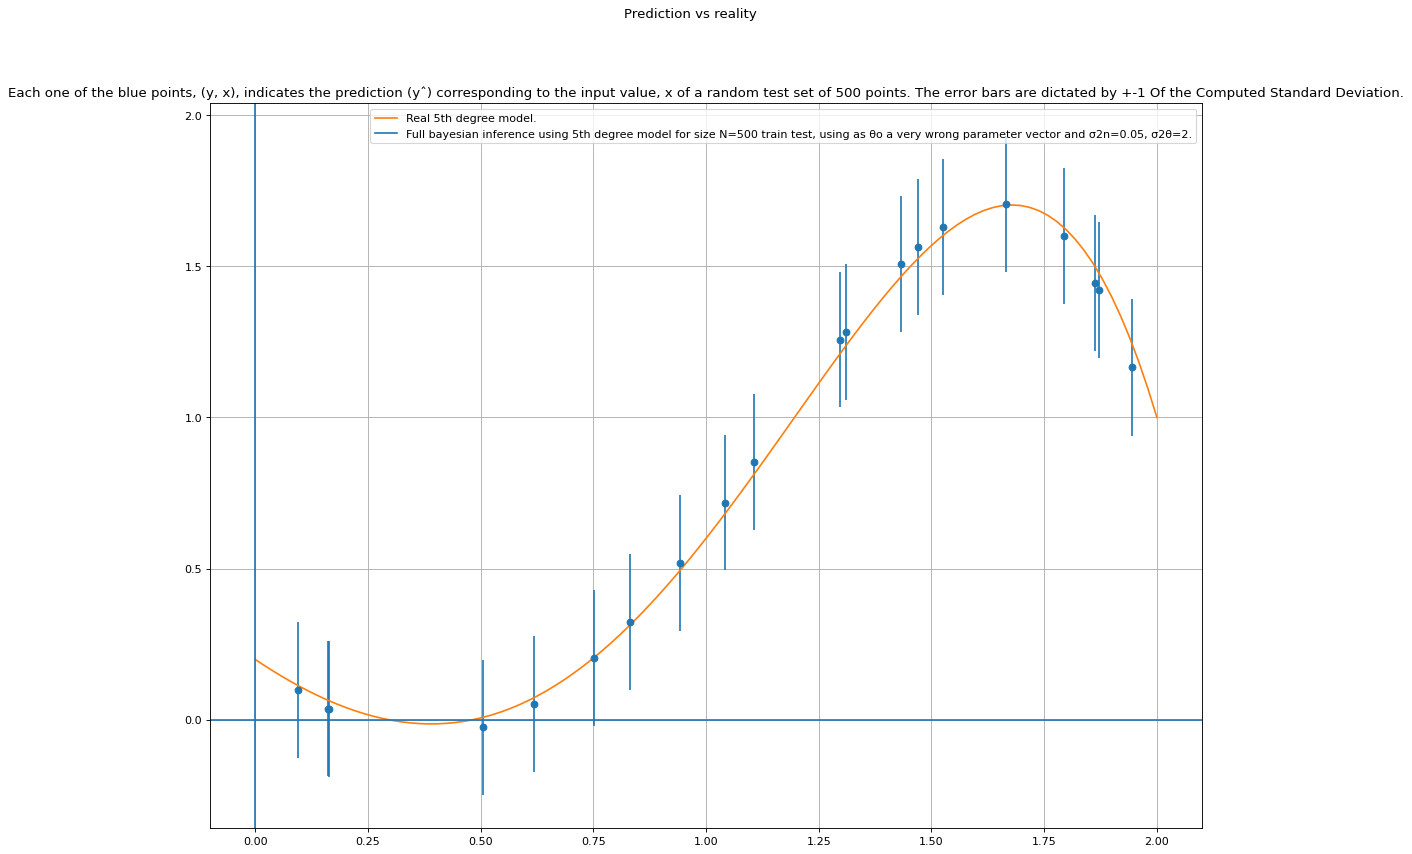

In [125]:
exec_bayesian_experiment(theta, 0.05, 0, 500, 2, theta0)

We can extract the following conclusions from the above plots:


a) It is really important that our train set has very little noise in it (σ2n=0.05). This leads to a train set that it is 
quite accurate and gives us as much detail as possible for the original model


b) When we can not take advantage of our detaled training set because of its small size (N=20) and we are quite fool to think
that our original estimate for θ parameter is really acurate (case 5a) we get back really bad results


c) if we are modest enough to think that we may be wrong about our model, (σ2θ=2) we have good results back. If we
have a really big training set as well (case 5d) we almost get back a great model despite the really bad estimation
of the parameter θ
 
 
d) In case our training set is so well formed,  even if we are arrogant to think that our wrong estimate of θ is correct,
if we have a large train set (case 5c) ,we can be saved and retrieve relatively good results

### Task 6

Define function for Expectation-Maximization method.

In [126]:
def expectation_maximization(phi, var_theta, var_noise):
    # K equals 4 since our model is of 5th degree with the fourth degree being a zero one.
    K = 4 
    a = [1/var_theta]
    b = [1/var_noise]
    phi_trans = np.transpose(phi)
    s_theta_y = np.linalg.inv(a[0] * np.identity(5) + b[0] * np.matmul(phi_trans, phi))
    mean_theta_y = np.matmul(np.matmul(b[0] * s_theta_y, phi_trans), y_train)   
    A = (np.linalg.norm(mean_theta_y))**2 + np.trace(s_theta_y)
    B = (np.linalg.norm(y_train - np.matmul(phi, mean_theta_y)))**2 + np.trace(np.matmul(np.matmul(phi, s_theta_y), phi_trans))
    a.append(K/A)
    b.append(N/B)
    while abs(a[-1] - a[-2]) > 0.1 or abs(b[-1] - b[-2]) > 0.1:
        s_theta_y = np.linalg.inv(a[-1] * np.identity(5) + b[-1] * np.matmul(phi_trans, phi))
        mean_theta_y = np.matmul(np.matmul(b[-1] * s_theta_y, phi_trans), y_train)   
        A = (np.linalg.norm(mean_theta_y))**2 + np.trace(s_theta_y)
        B = (np.linalg.norm(y_train - np.matmul(phi, mean_theta_y)))**2 + np.trace(np.matmul(np.matmul(phi, s_theta_y), phi_trans))
        a.append(K/A)
        b.append(N/B)
    # The final estimates.
    var_noise = 1/b[-1] 
    var_theta = 1/a[-1]
    print ('Our expectation maximization method has converged to \n σ2n:{0} (variance of noise) \n σ2θ:{1} (variance of θ).'.format(var_noise, var_theta))
    return var_theta, var_noise, mean_theta_y

Case of  Ν_train=500, σ2θ=1, σ2n=1.


Our expectation maximization method has converged to 
 σ2n:0.0500472027198985 (variance of noise) 
 σ2θ:0.49225925160119927 (variance of θ).


<function matplotlib.pyplot.show(close=None, block=None)>

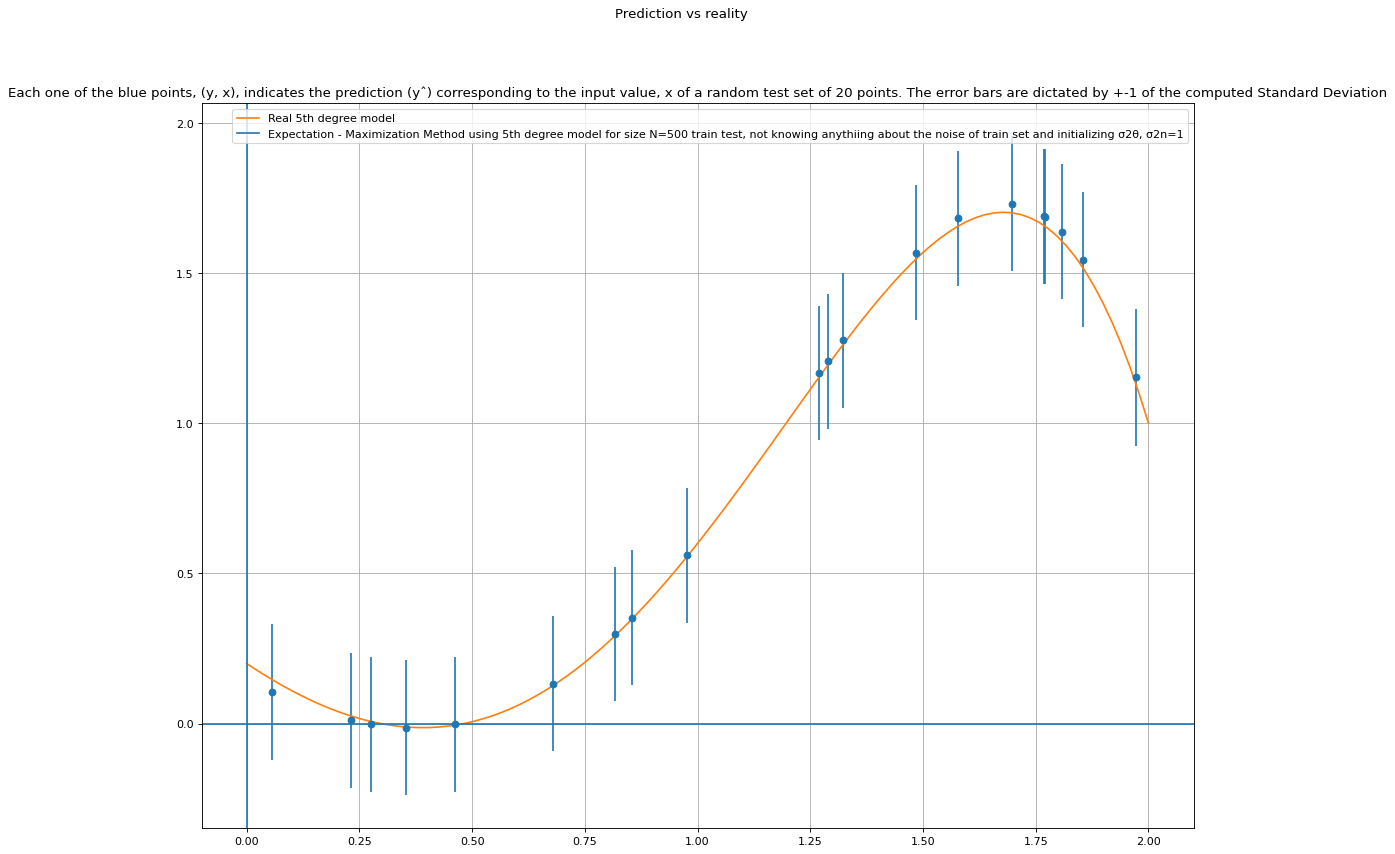

In [127]:
# Create the correct parameter vector. These parameter values will be used to generate our y_train  data and are equal to θ.
theta = np.array([-1,0.9,0.7,-0.2,0.2])

N = 500
y_train, phi = generate_train_data_correct_model(N, 0, 0.05, theta)

# Initialize our parameters. We will use the wrong ones meaning  σ2n=1, σ2θ=1.       
var_noise = 1    
var_theta = 1

var_theta, var_noise, mean_theta_y = expectation_maximization(phi, var_theta, var_noise)

# Create a  x-test set  of 20 points randomly selected in the interval [0,2].
N_test = 20
x_test = np.empty([N_test])
for i in range(N_test): 
    x_test[i]=random.uniform(0,2)
    
# Create the random vector mean_y (evaluation of y of my test set) and var_y (variance of the evaluation).
phi_trans = np.transpose(phi)
mean_y = np.empty([N_test])
var_y = np.empty([N_test])
for i in range(N_test):
    x = x_test[i]
    small_phi = np.array([x, x**2, x**3, x**5, 1])
    small_phi_trans = np.transpose(small_phi)
    mean_y[i] = np.matmul(small_phi_trans, mean_theta_y)
    var_y[i] = var_noise + (var_noise * var_theta) * np.matmul(np.matmul(small_phi_trans, np.linalg.inv(var_noise * np.identity(5) + var_theta * np.matmul(phi_trans, phi))), small_phi)

x_true, y_true = calc_true_curve(100, 0, 2)

figure(figsize=(16, 12), dpi=80)
plt.errorbar(x_test, mean_y, yerr=var_y**0.5, fmt='o')
plt.plot(x_true, y_true)
plt.grid('True')
plt.axvline()
plt.axhline()
plt.legend(['Real 5th degree model', 'Expectation - Maximization Method using 5th degree model for size N=500 train test, not knowing anythiing about the noise of train set and initializing σ2θ, σ2n=1'])
plt.title('Each one of the blue points, (y, x), indicates the prediction (yˆ) corresponding to the input value, x of a random test set of 20 points. The error bars are dictated by +-1 of the computed Standard Deviation')
plt.suptitle('Prediction vs reality')
plt.show
